In [1]:
from __future__ import print_function
from fenics import *
import numpy as np
import scipy
import random
import matplotlib.pyplot as plt
import copy
%matplotlib inline
from DLR import DLR2
from DLR import DLR
from DLR import DLR3

In [2]:
def l2_error(u,v):
    return assemble((u-v)*(u-v)*dx)
#     return assemble((u-v)*dx)


def Ans(t):
    Ans = []
    for i in range(sample_size): 
        str_expr =  "(1 + xi1) * sin(pi * x[0]) * exp((-5-xi1) * pi * pi * t) + (1 + xi2) * sin(2 * pi * x[0]) * exp((-5-xi1) * pi * pi * 4 * t) + (1 + xi3) * sin(3 * pi * x[0]) * exp((-5-xi1) * pi * pi * 9 * t)"
        # Create Expression with parameters xi1 and xi2 for each sample
        expr = Expression(str_expr, degree=10, xi1=xi[0][i], xi2=xi[1][i],xi3=xi[2][i],t=Constant(t))
        Ans.append(expr)
    return Ans

# def Ans(t):
#     Ans = []
#     for i in range(sample_size): 
#         str_expr =  f"(xi1[{i}]) * sin(pi * x[0]) *exp( -xi1[{i}] * pi * pi *t) + (xi2[{i}]) * sin(2*pi * x[0]) *exp( -xi1[{i}] * pi * pi *4*t) " 
#         Ans.append(Expression(str_expr, degree=10,xi1=Constant(xi[0]),xi2=Constant(xi[1]),t = t))
#     return Ans



In [3]:
sample_size = 5
xi = np.random.uniform(low=-np.sqrt(3), high=np.sqrt(3), size=(3,sample_size))
dt_list=[]
dh_list=[]
error_list = []
U0 =[Expression("sin(pi * x[0]) " , degree=10),Expression("sin(2*pi * x[0]) " , degree=10),Expression("sin(3*pi * x[0]) " , degree=10)]
mean = Constant(0)
a_0 = Constant(5)
a = []
a_sto = []
for i in range(sample_size):
    a.append(Constant(5 + xi[0][i]))
    a_sto.append(Constant(xi[0][i]))
Y = list(1 + xi)

In [7]:
random_heat = DLR(dt = 0.0017,n =10,R=3,mesh_type='1D',sample_size = sample_size,U=U0,mean = mean,Y=Y,a=a,a_0=a_0,a_sto=a_sto)

u = []
for i in range(sample_size):
    func =random_heat.mean
    func += (random_heat.U[0] * Constant(random_heat.Y[0][i]) ) + (random_heat.U[1] * Constant(random_heat.Y[1][i]) ) + (random_heat.U[2] * Constant(random_heat.Y[2][i]) )
    u.append(func)
error = 0
for i in range(sample_size):
    error += l2_error(Ans(0)[i],u[i])
print(error/sample_size)

0.004214475795253617


In [8]:
print(np.mean(random_heat.Y[0]))
print(np.dot(random_heat.Y[1],random_heat.Y[0]))
assemble(random_heat.U[1]*random_heat.U[0]*dx)

3.3306690738754695e-17
0.0


-7.068998164605489e-17

time:  0
energy norm:  534.6278280323131
L2 norm:  1.7518245291361072
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.Calling FFC just-in-time (JIT) compiler, this may take some time.

Solving linear variational problem.Calling FFC just-in-time (JIT) compiler, this may take some time.

Solving linear variational problem.
time:  0.0017
energy norm:  192.97946048973458
L2 norm:  1.2914546868017507


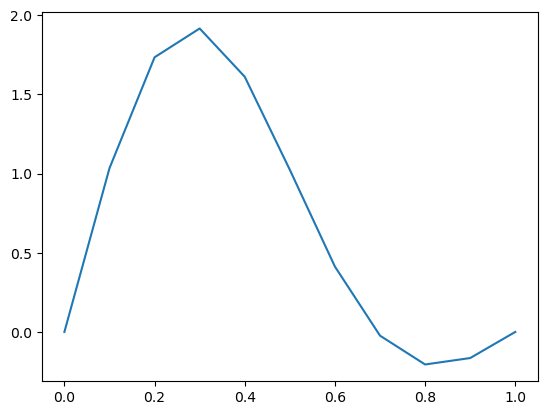

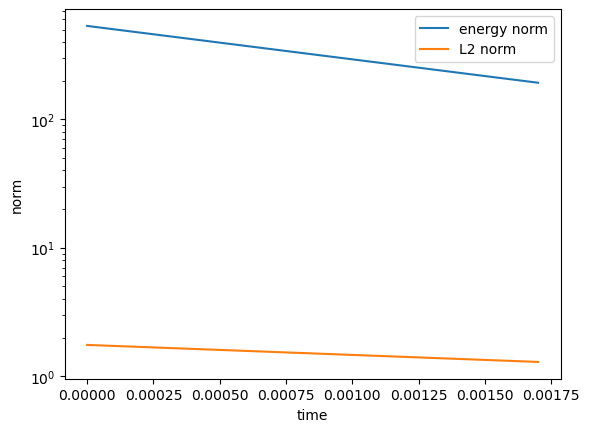

0.04619553387500246


In [9]:
random_heat.explicit_simulate(end=0.00169)

u2= []
for i in range(sample_size):
    func =random_heat.mean
    func += (random_heat.U[0] * Constant(random_heat.Y[0][i]) ) + (random_heat.U[1] * Constant(random_heat.Y[1][i])) + (random_heat.U[2] * Constant(random_heat.Y[2][i]))
    u2.append(func)
error2 = 0
for i in range(sample_size):
    error2 += l2_error(Ans(0.0017)[i],u2[i])
print(error2/sample_size)

In [7]:
random_heat2 = DLR2(dt = 0.0017,n =10,R=3,mesh_type='1D',sample_size = sample_size,U=U0,Y=Y,a=a,a_0=a_0,a_sto=a_sto)

u2 = []
for i in range(sample_size):
    func = Constant(0)
    func += (random_heat2.U[0] * Constant(random_heat2.Y[0][i]) ) + (random_heat2.U[1] * Constant(random_heat2.Y[1][i]) ) + (random_heat2.U[2] * Constant(random_heat2.Y[2][i]) )
    u2.append(func)
error2 = 0
for i in range(sample_size):
    error2 += l2_error(Ans(0)[i],u2[i])
print(error2/sample_size)

0.008398950408069986


In [8]:
print(np.mean(random_heat2.Y[0]))
print(np.dot(random_heat2.Y[0],random_heat2.Y[0]))
assemble(random_heat2.U[1]*random_heat2.U[0]*dx)

-0.9077257331604643
4.9999999999999964


3.903127820947816e-18

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
time:  0
energy norm:  1003.0875971888152
L2 norm:  4.344491549043241
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.
time:  0.0017
energy norm:  64.58300505160219
L2 norm:  0.572775364431512
Object cannot be plotted directly, projecting to piecewise linears.
Calling FFC just-in-time (JIT) compiler, this may take some time.


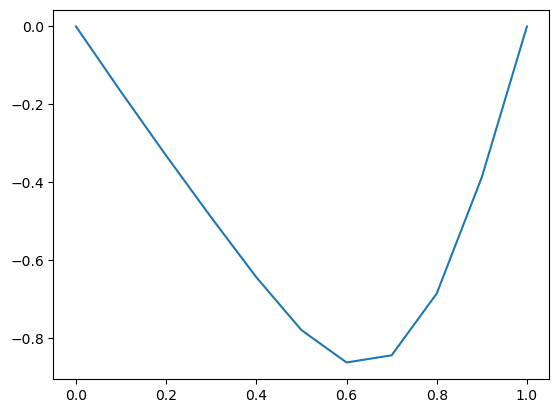

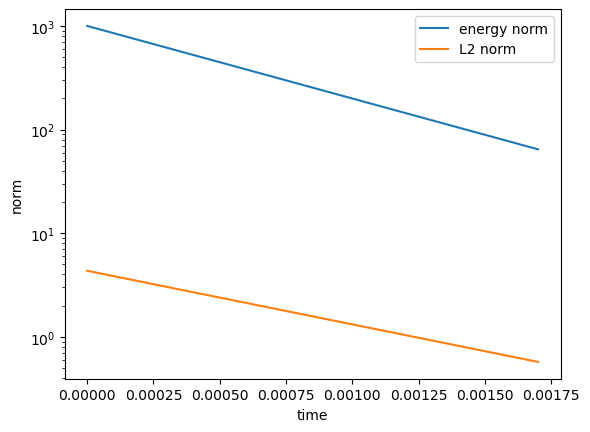

4.777246734548963


In [9]:
random_heat2.explicit_simulate(end=0.00169)

u2= []
for i in range(sample_size):
    func =Constant(0)
    func += (random_heat2.U[0] * Constant(random_heat2.Y[0][i]) ) + (random_heat2.U[1] * Constant(random_heat2.Y[1][i])) + (random_heat2.U[2] * Constant(random_heat2.Y[2][i]))
    u2.append(func)
error2 = 0
for i in range(sample_size):
    error2 += l2_error(Ans(0.0017)[i],u2[i])
print(error2/sample_size)

In [7]:
random_heat3 = DLR3(dt = 0.0017,n =50,R=3,mesh_type='1D',sample_size = sample_size,U=U0,mean = mean,Y=Y,a=a,a_0=a_0,a_sto=a_sto)

u3 = []
for i in range(sample_size):
    func =random_heat3.mean
    func += (random_heat3.U[0] * Constant(random_heat3.Y[0][i]) ) + (random_heat3.U[1] * Constant(random_heat3.Y[1][i]) ) + (random_heat3.U[2] * Constant(random_heat3.Y[2][i]) )
    u3.append(func)
error3 = 0
for i in range(sample_size):
    error3 += l2_error(Ans(0)[i],u3[i])
print(error3/sample_size)

6.326339801400719e-06


In [8]:
print(np.mean(random_heat3.Y[0]))
print(np.matmul(random_heat3.Y[0],random_heat3.Y[1]))
assemble(random_heat3.U[1]*random_heat3.U[0]*dx)

-8.881784197001253e-17
-1.1987975448691546


-4.845028458294598e-18

time:  0
energy norm:  365.83751233141663
L2 norm:  1.37494416714812
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.
Calling FFC just-in-time (JIT) compiler, this may take some time.
U0Solving linear variational problem.
 0.6364103190754791
U1 -2.3635607360183997e-17
U0 0.5730367856458678
U1 0.008587243853583533
Y [[ 1.29985704 -1.46274286  0.48772281 -0.42347232  0.09863533]
 [-1.17109514 -0.15150448  0.13519748  0.15554662  1.03185552]
 [ 0.34481475  0.34893903 -1.0432182  -0.86143109  1.21089551]]
Y [[ 1.29616229 -1.45915754  0.48760775 -0.41080926  0.08619677]
 [-1.05536402  0.0175476   0.01523971  0.14964038  0.87293634]
 [ 0.14074639  0.30612371 -0.72808413 -0.75378665  1.03500067]]
time:  0.0017
energy norm:  121.334272400205

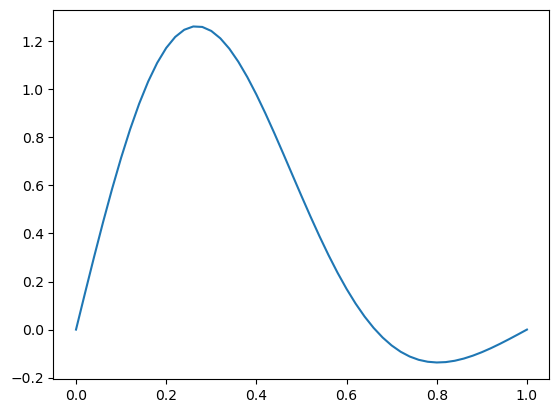

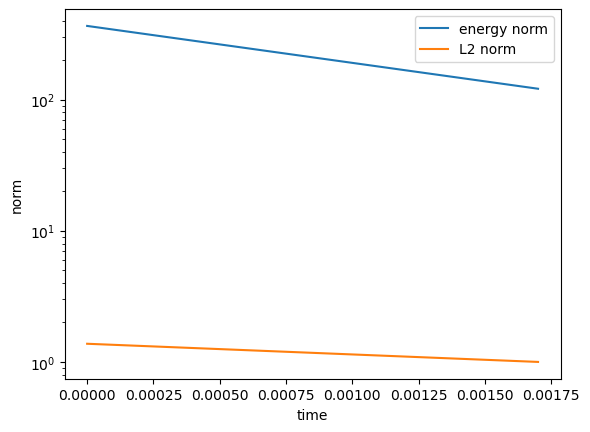

0.009615267484217826


In [9]:
random_heat3.explicit_simulate(end=0.00169)

u3= []
for i in range(sample_size):
    func =random_heat3.mean
    func += (random_heat3.U[0] * Constant(random_heat3.Y[0][i]) ) + (random_heat3.U[1] * Constant(random_heat3.Y[1][i])) + (random_heat3.U[2] * Constant(random_heat3.Y[2][i]))
    u3.append(func)
error3 = 0
for i in range(sample_size):
    error3 += l2_error(Ans(0.0017)[i],u3[i])
print(error3/sample_size)

In [16]:
error3=0
for i in range(sample_size):
    error3 += l2_error(interpolate(Constant(0),random_heat.V),Ans(0.00017)[i])
print(error3/sample_size)

-0.6764864366398287


In [17]:
error3=0
for i in range(sample_size):
    error3 += l2_error(interpolate(Constant(0),random_heat.V),u2[i])
print(error3/sample_size)

TypeError: '<' not supported between instances of 'Mesh' and 'Mesh'

In [30]:
error3=0
for i in range(sample_size):
    error3 += l2_error(Ans(0.0017)[i],u2[i])
#     error3 += l2_error(Ans(0)[i],u[i])
print(error3/sample_size)

0.01967596649563046


In [25]:
for i in range(sample_size):
    print(l2_error(Ans(0.0017)[i],u2[i]))

0.006817222626129388
0.002815026804976809
0.0742199209132283
0.00032647195149732516
0.01155913904725417
0.011933306889535597
0.007317882622992256
0.0062542442029383345
0.012157338779825992
0.025329381966959982


In [1]:
error2 = 0
for i in range(sample_size):
    error2 += l2_error(Ans(0.0017)[i],u[i])
print(error2/sample_size)

NameError: name 'sample_size' is not defined

In [73]:
mesh = UnitIntervalMesh(10)
V = FunctionSpace(mesh, 'P', 1)
u = interpolate(Expression("x[0]", degree=1), V)
u.compute_vertex_values()[0]=1

In [62]:
random_heat = DLR(dt = 0.00017,n = 7,R=3,mesh_type='1D',sample_size = sample_size,U=U0,mean = mean,Y=Y,a=a,a_0=a_0,a_sto=a_sto)
(random_heat.U[0].compute_vertex_values()[:]*random_heat.Y[0][0]+random_heat.U[1].compute_vertex_values()[:]*random_heat.Y[1][0]+random_heat.U[2].compute_vertex_values()[:]*random_heat.Y[2][0])


array([-0.00000000e+00,  2.43457363e-01,  7.88530886e-01,  1.55108869e+00,
        2.09469918e+00,  2.01001257e+00,  1.22300962e+00,  3.54952582e-16])

In [60]:
random_heat3 = DLR3(dt = 0.00017,n =7,R=3,mesh_type='1D',sample_size = sample_size,U=U0,mean = mean,Y=Y,a=a,a_0=a_0,a_sto=a_sto)
random_heat3.reorthogonalize()
(random_heat3.U[0].compute_vertex_values()[:]*random_heat3.Y[0][0])+(random_heat3.U[1].compute_vertex_values()[:]*random_heat3.Y[1][0])+(random_heat3.U[2].compute_vertex_values()[:]*random_heat3.Y[2][0])

array([0.00000000e+00, 2.43457363e-01, 7.88530886e-01, 1.55108869e+00,
       2.09469918e+00, 2.01001257e+00, 1.22300962e+00, 3.54952582e-16])